In [11]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model

# Load the Data

In [12]:
# Set your custom data folder
data_folder = 'train'
data_folder_test = 'test'
image_files = os.listdir(data_folder)
image_files_test = os.listdir(data_folder_test)

# Load custom data
custom_data = []
for image_file in image_files:
    img_path = os.path.join(data_folder, image_file)
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))
    img_array = np.array(img)
    custom_data.append(img_array)

custom_data = np.array(custom_data)
custom_data = custom_data.astype('float32') / 255.0

# Load test data
custom_data_test = []
for image_file_test in image_files_test:
    img_path_test = os.path.join(data_folder_test, image_file_test)
    img_test = Image.open(img_path_test).convert('L')  # Convert to grayscale
    img_test = img_test.resize((28, 28))
    img_array_test = np.array(img_test)
    custom_data_test.append(img_array_test)

custom_data_test = np.array(custom_data_test)
custom_data_test = custom_data_test.astype('float32') / 255.0

In [13]:
# Add noise to custom data
noise_factor = 0.5
custom_data_noisy = custom_data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=custom_data.shape)

custom_data_noisy_test = custom_data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=custom_data_test.shape)

# Reshape the data to match the autoencoder input shape
custom_data_reshaped = custom_data.reshape(-1, 28 * 28)
custom_data_noisy_reshaped = custom_data_noisy.reshape(-1, 28 * 28)

custom_data_reshaped_test = custom_data_test.reshape(-1, 28 * 28)
custom_data_noisy_reshaped_test = custom_data_noisy_test.reshape(-1, 28 * 28)

# Training and Denoising

In [14]:
input_img = Input(shape=(28 * 28,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(28 * 28, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Training
autoencoder.fit(custom_data_noisy_reshaped, custom_data_reshaped, epochs=10, batch_size=256, shuffle=True)

# Denoising
decoded_custom_data_noisy = autoencoder.predict(custom_data_noisy_reshaped)

decoded_custom_data_noisy_test = autoencoder.predict(custom_data_noisy_reshaped_test)



Epoch 1/10
29/29 [==============================] - 1s 6ms/step - loss: 0.5556
Epoch 2/10
29/29 [==============================] - 0s 6ms/step - loss: 0.4168
Epoch 3/10
29/29 [==============================] - 0s 5ms/step - loss: 0.3653
Epoch 4/10
29/29 [==============================] - 0s 5ms/step - loss: 0.3367
Epoch 5/10
29/29 [==============================] - 0s 6ms/step - loss: 0.3181
Epoch 6/10
29/29 [==============================] - 0s 7ms/step - loss: 0.3047
Epoch 7/10
29/29 [==============================] - 0s 5ms/step - loss: 0.2949
Epoch 8/10
29/29 [==============================] - 0s 5ms/step - loss: 0.2873
Epoch 9/10
29/29 [==============================] - 0s 5ms/step - loss: 0.2815
Epoch 10/10
63/63 [==============================] - 0s 1ms/step


# Display random original, noisy, and denoised images


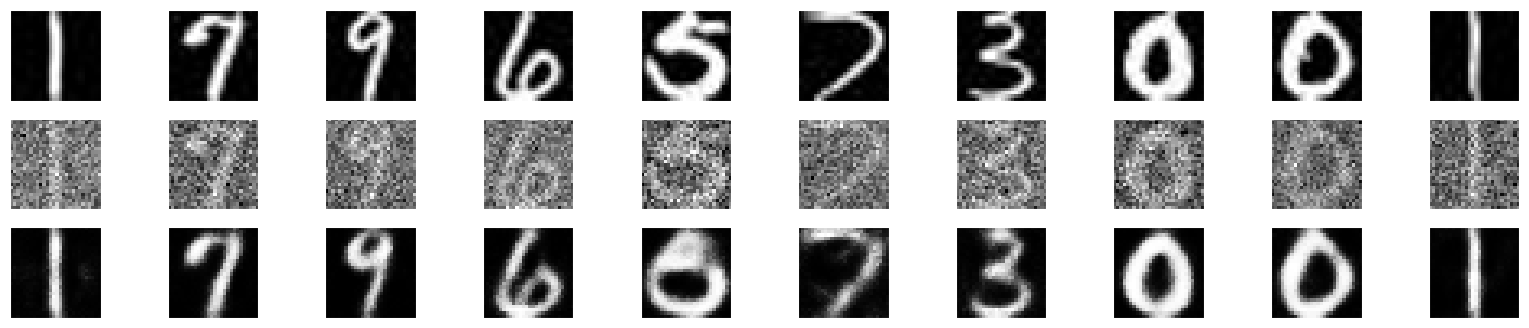

In [15]:
import random
n = 10
random_indices = random.sample(range(len(custom_data)), n)
plt.figure(figsize=(20, 4))

for idx, i in enumerate(random_indices):
    # Original Image
    ax = plt.subplot(3, n, idx + 1)
    plt.imshow(custom_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy Image
    ax = plt.subplot(3, n, idx + 1 + n)
    plt.imshow(custom_data_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised Image
    ax = plt.subplot(3, n, idx + 1 + 2 * n)
    plt.imshow(decoded_custom_data_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


# Display random original, noisy, and denoised images in test data


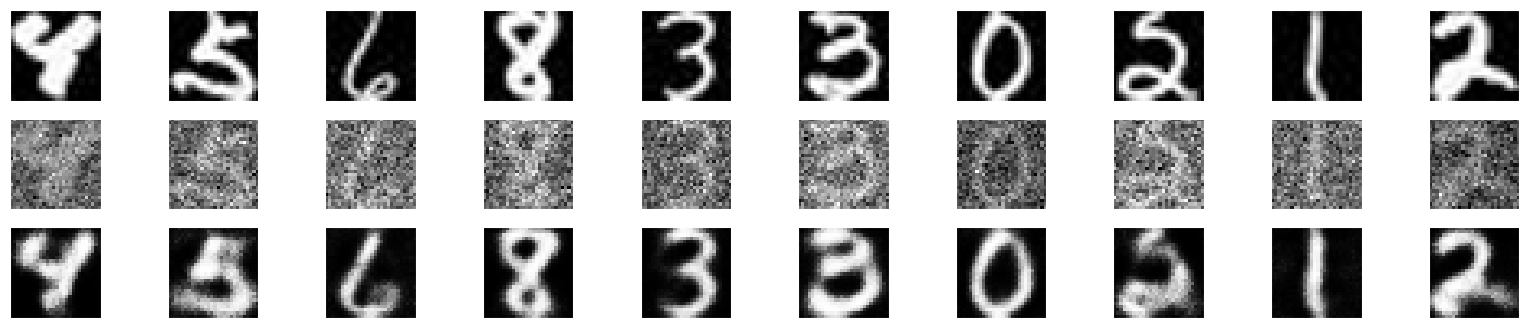

In [16]:
import random
n = 10
random_indices = random.sample(range(len(custom_data_test)), n)
plt.figure(figsize=(20, 4))

for idx, i in enumerate(random_indices):
    # Original Image
    ax = plt.subplot(3, n, idx + 1)
    plt.imshow(custom_data_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy Image
    ax = plt.subplot(3, n, idx + 1 + n)
    plt.imshow(custom_data_noisy_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised Image
    ax = plt.subplot(3, n, idx + 1 + 2 * n)
    plt.imshow(decoded_custom_data_noisy_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()